In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# Read the CSV file into a DataFrame
wine_df = pd.read_csv('winequality-red.csv')

# Display the first few rows of the DataFrame to understand its structure
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Check for null values in the DataFrame
print("Null values before cleanup:")
print(wine_df.isnull().sum())

# Clean up null values
wine_df.dropna(inplace=True)

# Check for null values again after cleanup
print("Null values after cleanup:")
print(wine_df.isnull().sum())

Null values before cleanup:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Null values after cleanup:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [6]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


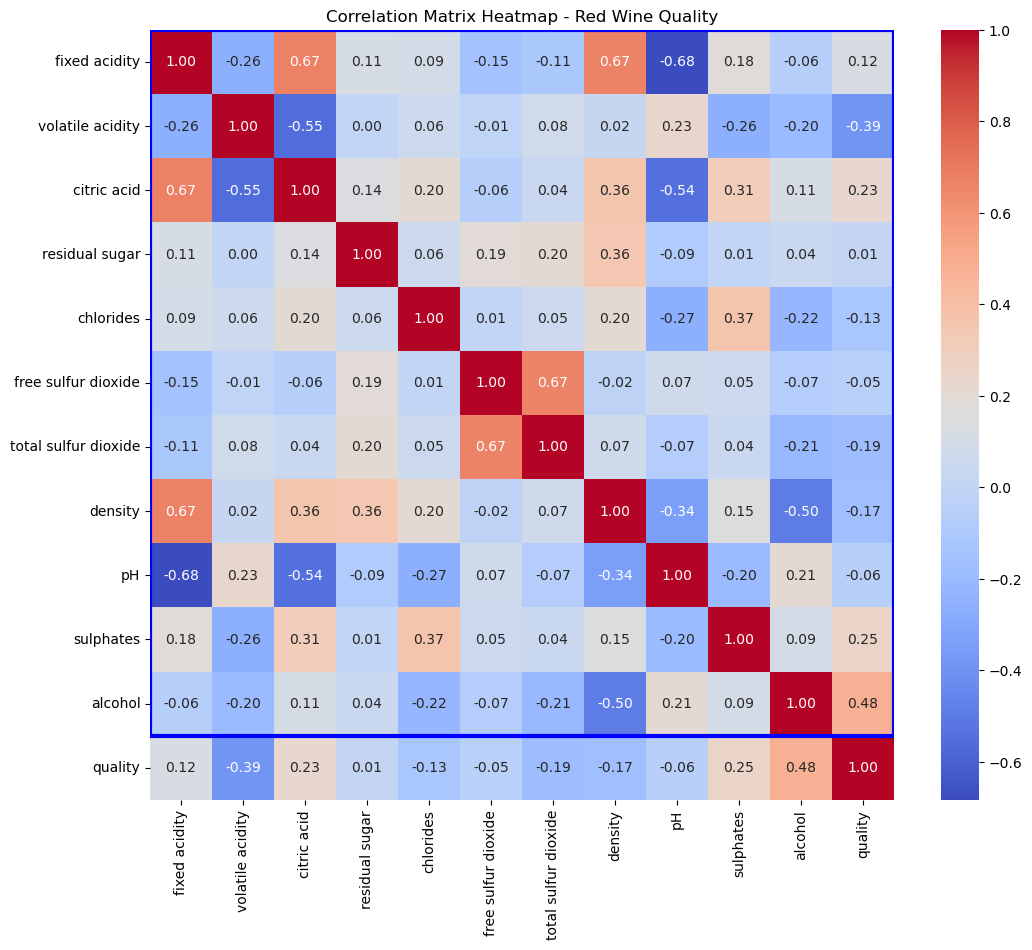

In [9]:
# Compute the correlation matrix
# Calculate correlation matrix
correlation_matrix = wine_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Matrix Heatmap - Red Wine Quality')

# Highlight correlations with 'Potability'
highlight = correlation_matrix['quality'].sort_values(ascending=False)
highlight = highlight.drop('quality')  # Remove self-correlation
highlight_cols = highlight.index.tolist()
heatmap.add_patch(plt.Rectangle((0, 0), len(correlation_matrix), len(highlight_cols), fill=False, edgecolor='blue', lw=3))

# Show plot
plt.show()

In [92]:
# Define bins and labels
bins = [float('-inf'), 6.5, 8.5, float('inf')]
labels = ['Low', 'Good', 'High']

# Create a new column 'ph_category' based on bins
water_df['ph_category'] = pd.cut(water_df['ph'], bins=bins, labels=labels)

water_df['ph_category'].replace({'Low': 0, 'High': 0, 'Good': 1}, inplace=True)

# Display the DataFrame with the new column
water_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,ph_category,Hardness Index,Turbidity Index
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,1,1.43,0.925754
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,0,1.21,0.815015
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0,0,1.26,0.511942
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0,0,1.65,0.534598
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0,0,1.36,0.880285


In [93]:
# Create a new column 'Hardness Index' by dividing 'hardness' by 150mg is considerate change in taste of water Resource: https://www.intechopen.com/chapters/69568
water_df['Hardness Index'] = (water_df['Hardness'] / 150).round(2)
water_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,ph_category,Hardness Index,Turbidity Index
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,1,1.43,0.925754
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,0,1.21,0.815015
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0,0,1.26,0.511942
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0,0,1.65,0.534598
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0,0,1.36,0.880285


In [95]:
# Create a new column 'Turbidity Index' by dividing 'Turbidity' by 5
water_df['Turbidity Index'] = (water_df['Turbidity'] / 5).round(2)
water_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,ph_category,Hardness Index,Turbidity Index
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,1,1.43,0.93
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,0,1.21,0.82
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0,0,1.26,0.51
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0,0,1.65,0.53
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0,0,1.36,0.88


In [96]:
# Separate features (X) and target variable (y)
X = water_df.drop(columns=['Potability'])
y = water_df['Potability']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.607940446650124

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.67      0.66       231
           1       0.54      0.53      0.54       172

    accuracy                           0.61       403
   macro avg       0.60      0.60      0.60       403
weighted avg       0.61      0.61      0.61       403



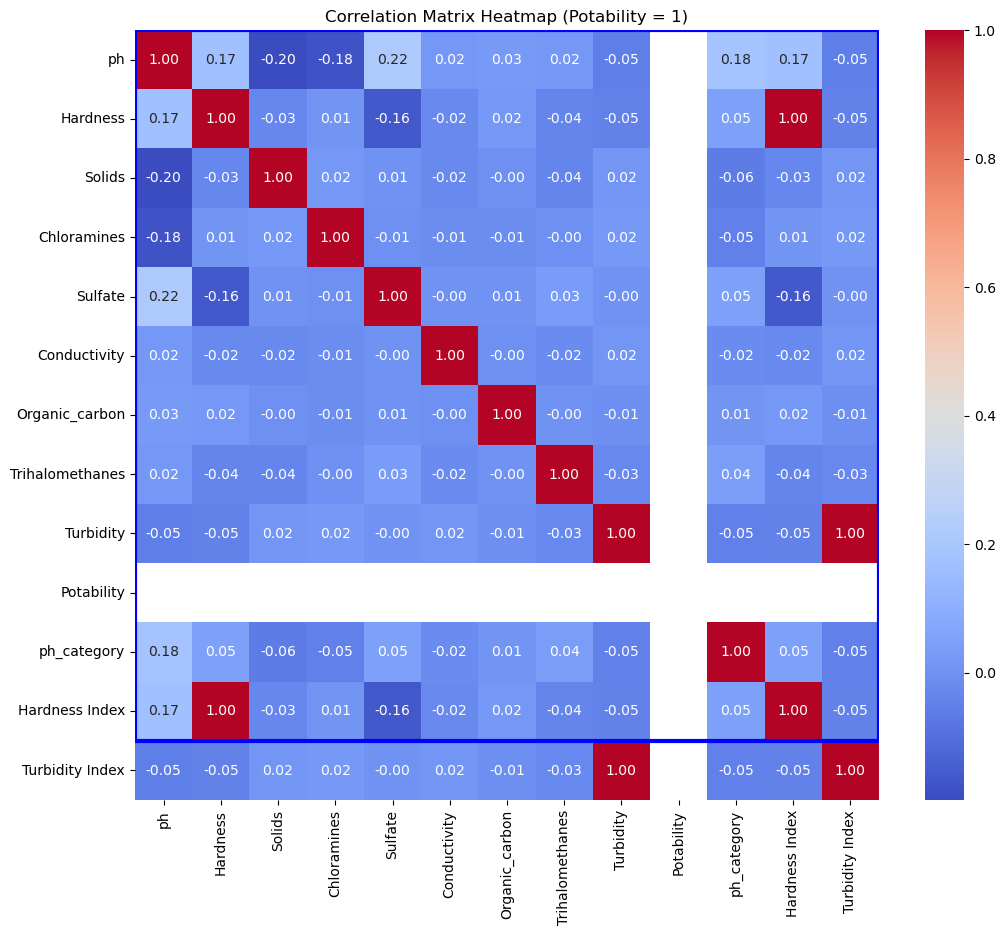

In [97]:
# Filter the DataFrame where 'Potability' equals 1
water_df_potable = water_df[water_df_encoded['Potability'] == 0]

# Calculate correlation matrix
correlation_matrix = water_df_potable.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Matrix Heatmap (Potability = 1)')

# Highlight correlations with 'Potability'
highlight = correlation_matrix['Potability'].sort_values(ascending=False)
highlight = highlight.drop('Potability')  # Remove self-correlation
highlight_cols = highlight.index.tolist()
heatmap.add_patch(plt.Rectangle((0, 0), len(correlation_matrix), len(highlight_cols), fill=False, edgecolor='blue', lw=3))

# Show plot
plt.show()

In [77]:
#!pip install pycaret

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pycaret from https://files.pythonhosted.org/packages/c7/d8/4e703f17f17d7d7764fe6d586872e787ce3a248640221f5f2d586f671eee/pycaret-3.3.0-py3-none-any.whl.metadata
  Obtaining dependency information for scikit-learn>1.4.0 from https://files.pythonhosted.org/packages/7b/0e/25d6b5678ed3c7e12bc94d047d0e9492e89cc78b7ea0034ac0f1cf2ff304/scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/160.5 kB ? eta -:--:--
     -------------------------- ----------- 112.6/160.5 kB 3.2 MB/s eta 0:00:01
     -------------------------------------- 160.5/160.5 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for imbalanced-learn>=0.12.0 from https://files.pythonhosted.org/packages/92/e8/86c36e1b13007ca9c89381adac6c078cfc8fb71841a

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [98]:
from pycaret.classification import *
clf = setup(water_df_encoded, target = "Potability", session_id = 786)
compare_models()

ImportError: cannot import name '_Scorer' from 'sklearn.metrics._scorer' (C:\Anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py)

In [99]:
# Separate features (X) and target variable (y)
X = water_df.drop(columns=['Potability', 'ph','Hardness','Turbidity'])
y = water_df['Potability']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.56575682382134

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.63      0.63       231
           1       0.49      0.48      0.48       172

    accuracy                           0.57       403
   macro avg       0.55      0.55      0.55       403
weighted avg       0.56      0.57      0.56       403



In [101]:
# Separate features (X) and target variable (y)
X = water_df.drop(columns=['Potability','ph','Hardness','Turbidity'])
y = water_df['Potability']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Extra Trees Classifier
etc = ExtraTreesClassifier(random_state=42)
etc.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = etc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6327543424317618
